# Uber Trip Analysis - Data Profiling and EDA

## Objective
Perform strict data understanding, validation, and exploratory data analysis (EDA) on the Uber January-February 2015 dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use('ggplot')
%matplotlib inline

## 1. Data Loading and Inspection

In [2]:
df = pd.read_csv('../Uber-Jan-Feb-FOIL.csv')
df.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [4]:
# Check for missing values
print(df.isnull().sum())

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64


## 2. Data Cleaning and Transformation
- Convert `date` to datetime objects.
- Sort by date.
- Aggregate to get total daily trips (summing across dispatching bases).

In [5]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Aggregate by date to get daily level data for the whole city/dataset
daily_df = df.groupby('date')[['trips', 'active_vehicles']].sum().reset_index()
daily_df.set_index('date', inplace=True)

print(daily_df.head())

            trips  active_vehicles
date                              
2015-01-01  56437             6885
2015-01-02  39189             6330
2015-01-03  58449             6510
2015-01-04  40798             5838
2015-01-05  42752             6884


In [6]:
# Date range profiling
print(f"Date Range: {daily_df.index.min()} to {daily_df.index.max()}")
print(f"Total Days: {len(daily_df)}")

Date Range: 2015-01-01 00:00:00 to 2015-02-28 00:00:00
Total Days: 59


## 3. Exploratory Data Analysis (EDA)
### Daily Trip Trends

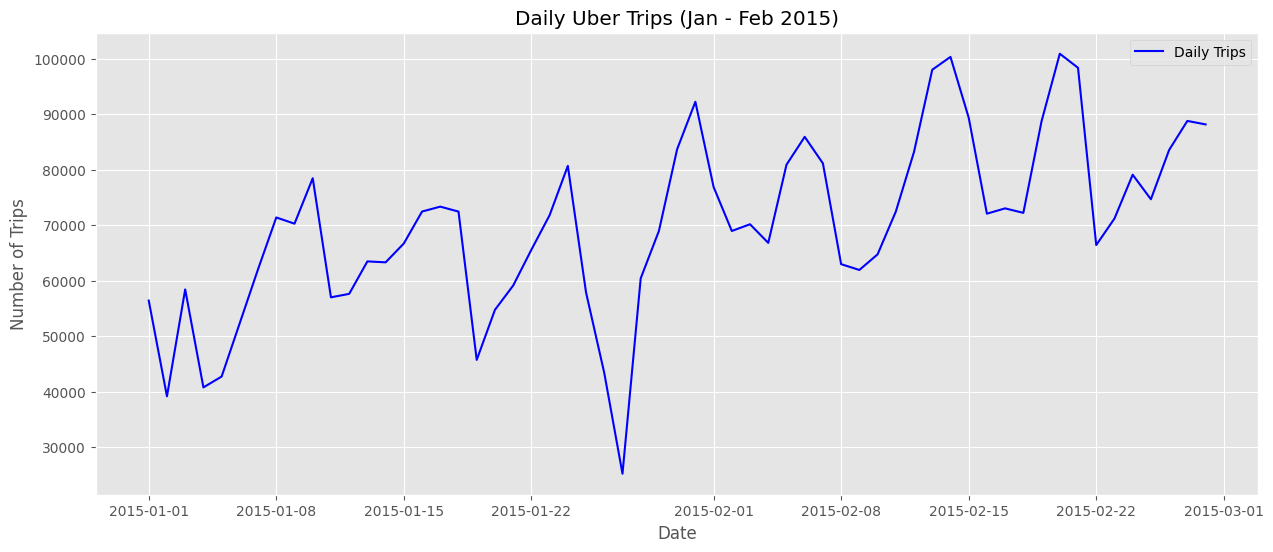

In [7]:
plt.figure(figsize=(15, 6))
plt.plot(daily_df.index, daily_df['trips'], label='Daily Trips', color='blue')
plt.title('Daily Uber Trips (Jan - Feb 2015)')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.legend()
plt.grid(True)
plt.show()

### Seasonal Decomposition

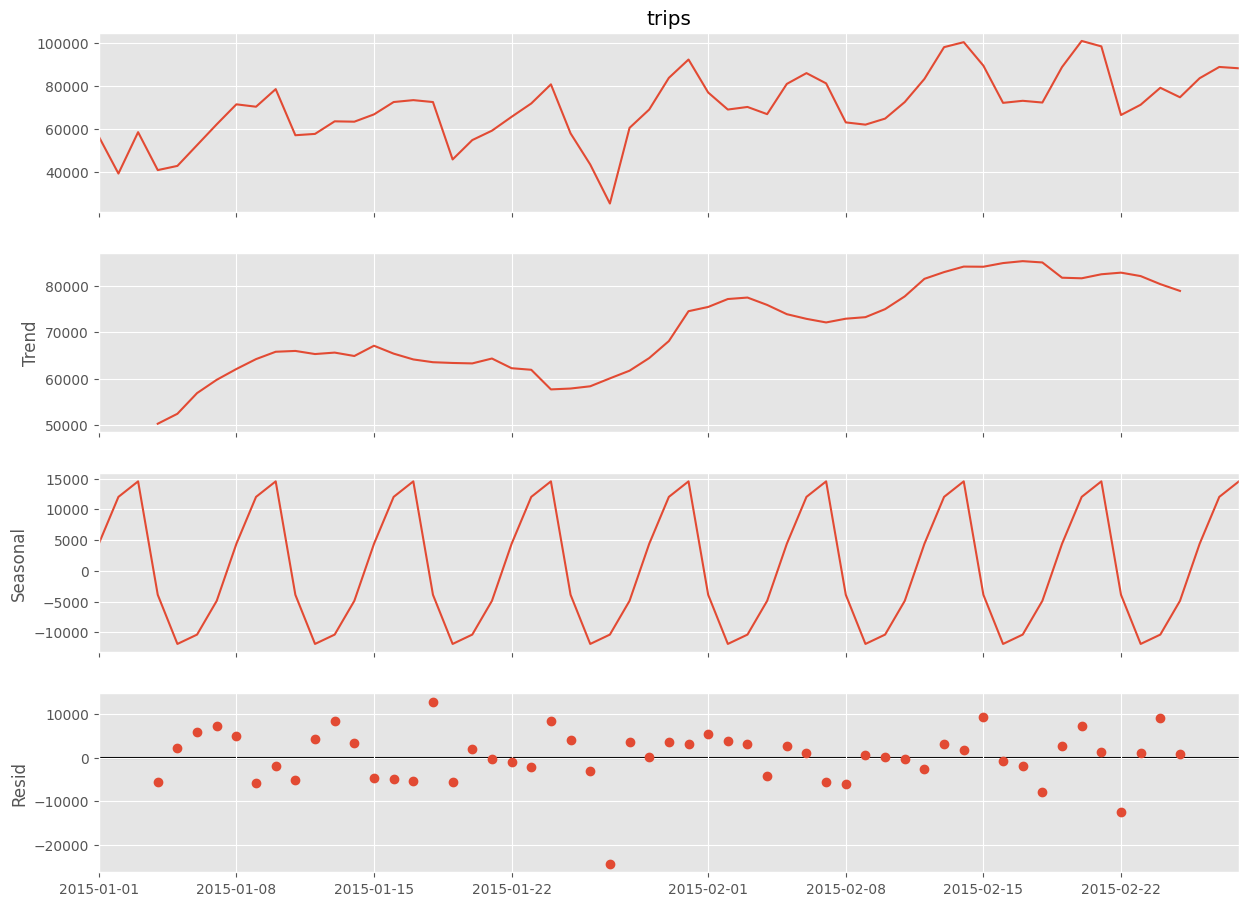

In [8]:
decomposition = seasonal_decompose(daily_df['trips'], model='additive', period=7)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

### Weekday vs Weekend Analysis

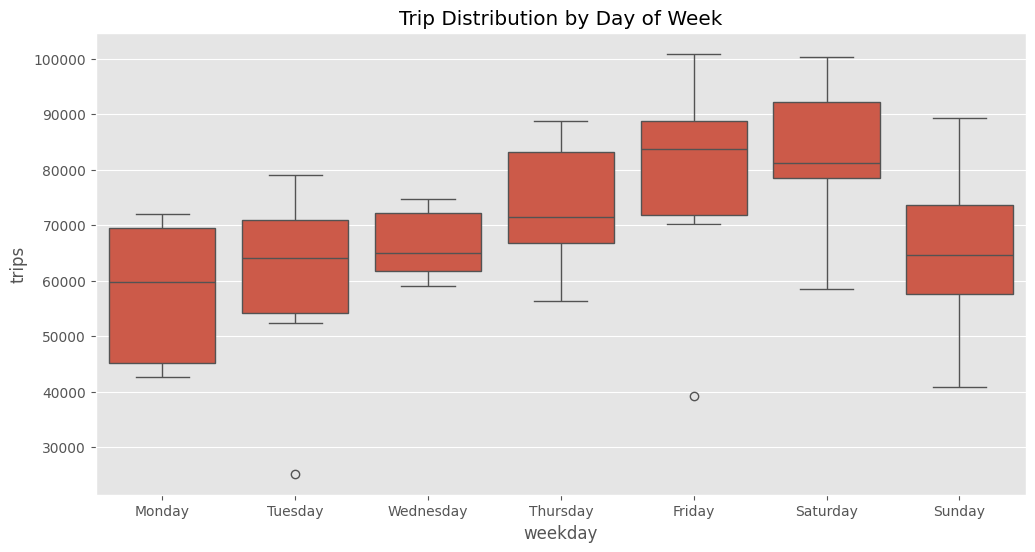

In [9]:
daily_df['weekday'] = daily_df.index.day_name()
daily_df['is_weekend'] = daily_df.index.weekday >= 5

plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='trips', data=daily_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Trip Distribution by Day of Week')
plt.show()

## 4. Save Processed Data
Saving the aggregated daily data for feature engineering and modeling.

In [10]:
daily_df.to_csv('../data_clean/daily_aggregated_trips.csv')
print("Data saved to ../data_clean/daily_aggregated_trips.csv")

Data saved to ../data_clean/daily_aggregated_trips.csv
